Kitchen
    cost  constructionTime  employer.maxWorkforce
0  10000               900                      7
1  20000              1800                     12
2  40000              2700                     20
3  85000              4800                     35


<Figure size 432x288 with 0 Axes>

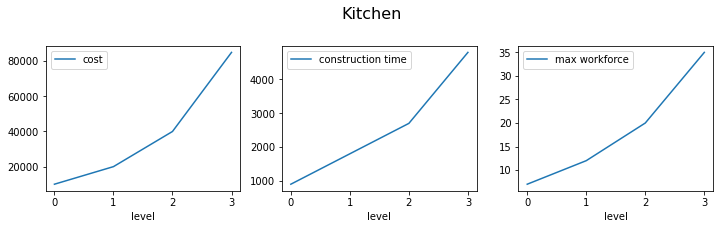

Shop
    cost  constructionTime  employer.maxWorkforce
0  12500              1200                      5
1  25000              2400                      9
2  48000              3600                     15
3  99000              8000                     25


<Figure size 432x288 with 0 Axes>

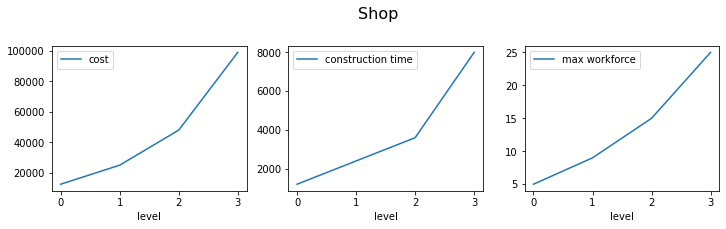

House
     cost  constructionTime  residence.beds
0   17000               450              10
1   35000               900              18
2   60000              1800              30
3  135000              4000              50
4  250000              7200              90


<Figure size 432x288 with 0 Axes>

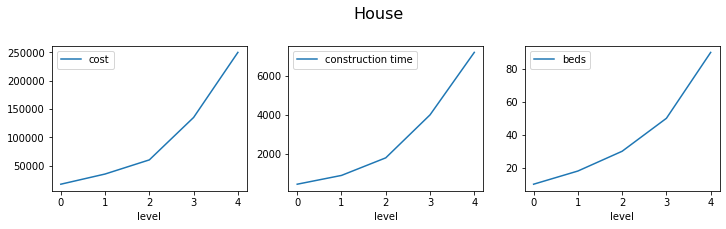

School
    cost  constructionTime
0  30000              3600


<Figure size 432x288 with 0 Axes>

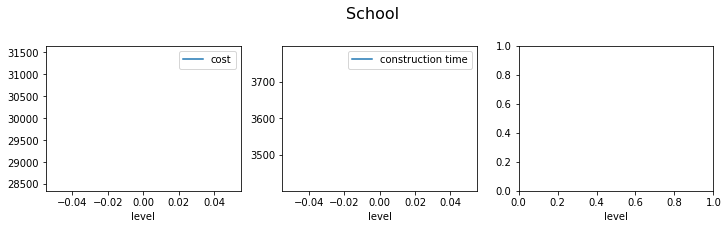

In [94]:
from matplotlib import pyplot as plt
import pandas as pd
import requests, json
%matplotlib inline

url = requests.get("http://localhost:3000/api/gamedata")
data = json.loads(url.text)

for k in data['buildings']:
    b = data['buildings'][k]
    print(b['title'])

    df = pd.json_normalize(b['levelInfos'], max_level=1)
    
    plt.figure()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
    fig.suptitle(b['title'], fontsize=16)
    fig.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    axes[0].set_xlabel('level')
    axes[1].set_xlabel('level')
    axes[2].set_xlabel('level')
    
    df['cost'].plot(ax=axes[0], legend=True)
    
    df['constructionTime'].plot(ax=axes[1], legend=True, label='construction time')
    
    if 'employer.maxWorkforce' in df:
        df['employer.maxWorkforce'].plot(ax=axes[2], legend=True, label='max workforce')
        
    if 'residence.beds' in df:
        df['residence.beds'].plot(ax=axes[2], legend=True, label='beds')
        
    print(df)
    plt.show()
    
        
    
